<a href="https://colab.research.google.com/github/jarda51/ZSkladLogin2/blob/master/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mount_my_drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
##################################################################################################################

In [ ]:
# Renewable internal freshwater resources per capita = > rifr per capita

In [ ]:
!head -10  './drive/MyDrive/ColabNotebooks/final_project/Renewable internal freshwater resources per capita/API_ER.H2O.INTR.PC_DS2_en_csv_v2_2456313.csv'

﻿"Data Source","World Development Indicators",

"Last Updated Date","2021-05-25",

"Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020",
"Aruba","ABW","Renewable internal freshwater resources per capita (cubic meters)","ER.H2O.INTR.PC","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","",
"Afghanistan","AFG","Renewable internal freshwater resources per capita (cubic meters)","ER.H2O.INTR.PC","","","5042.00368691841","","","","",

In [ ]:
!sed -e '1,4d' < './drive/MyDrive/ColabNotebooks/final_project/Renewable internal freshwater resources per capita/API_ER.H2O.INTR.PC_DS2_en_csv_v2_2456313.csv' > './drive/MyDrive/ColabNotebooks/final_project/rifr.csv'

In [ ]:
import pandas as pd
rifr = pd.read_csv('./drive/MyDrive/ColabNotebooks/final_project/rifr_cut.csv')

In [ ]:
rifr.shape

(264, 66)

What columns are there?

In [ ]:
rifr.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

Get rid of unecessary columns 'Country Name', 'Indicator Name', 'Indicator Code','Unnamed: 65'  and check it

In [ ]:
rifr = rifr.drop(['Country Name', 'Indicator Name', 'Indicator Code','Unnamed: 65'], axis=1)
rifr.columns

Index(['Country Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

Let´s see the head:

In [ ]:
rifr.head()

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,NaN,NaN,5042.003687,NaN,NaN,NaN,NaN,4533.686105,NaN,NaN,NaN,NaN,3998.739740,NaN,NaN,NaN,NaN,3579.751317,NaN,NaN,NaN,NaN,3659.995926,NaN,NaN,NaN,NaN,4063.067074,NaN,NaN,NaN,NaN,3254.968781,NaN,NaN,NaN,NaN,2435.795479,NaN,NaN,NaN,NaN,2086.212107,NaN,NaN,NaN,NaN,1739.817987,NaN,NaN,NaN,NaN,1513.091078,NaN,NaN,NaN,NaN,1299.026901,NaN,NaN,NaN
2,AGO,NaN,NaN,26388.333932,NaN,NaN,NaN,NaN,25631.065405,NaN,NaN,NaN,NaN,23685.487454,NaN,NaN,NaN,NaN,19644.970257,NaN,NaN,NaN,NaN,16530.864129,NaN,NaN,NaN,NaN,13845.686086,NaN,NaN,NaN,NaN,11692.796116,NaN,NaN,NaN,NaN,9951.874617,NaN,NaN,NaN,NaN,8447.769695,NaN,NaN,NaN,NaN,7079.523087,NaN,NaN,NaN,NaN,5894.551805,NaN,NaN,NaN,NaN,4963.653313,NaN,NaN,NaN
3,ALB,NaN,NaN,15718.869480,NaN,NaN,NaN,NaN,13685.402610,NaN,NaN,NaN,NaN,11992.193038,NaN,NaN,NaN,NaN,10702.012217,NaN,NaN,NaN,NaN,9661.391571,NaN,NaN,NaN,NaN,8723.555708,NaN,NaN,NaN,NaN,8284.470867,NaN,NaN,NaN,NaN,8544.345311,NaN,NaN,NaN,NaN,8816.752485,NaN,NaN,NaN,NaN,9057.187215,NaN,NaN,NaN,NaN,9274.579618,NaN,NaN,NaN,NaN,9361.546040,NaN,NaN,NaN
4,AND,NaN,NaN,20533.506831,NaN,NaN,NaN,NaN,15203.776857,NaN,NaN,NaN,NaN,11735.832218,NaN,NaN,NaN,NaN,9630.465961,NaN,NaN,NaN,NaN,8068.722197,NaN,NaN,NaN,NaN,6513.259726,NaN,NaN,NaN,NaN,5359.326179,NaN,NaN,NaN,NaN,4906.182474,NaN,NaN,NaN,NaN,4505.417636,NaN,NaN,NaN,NaN,3816.941609,NaN,NaN,NaN,NaN,3828.842491,NaN,NaN,NaN,NaN,4098.648070,NaN,NaN,NaN


There are a lot of NaN in various columns. Let´s get rid of columns with all NaN

In [ ]:
rifr.dropna(axis=1, how='all', inplace=True)

In [ ]:
rifr.shape

(264, 14)

We have now 14 columns instead of 66. 52 Columns were with NaN. Now we can inspect the general overview:

In [ ]:
rifr.describe()

,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007,2012,2014,2017
count,197.000000,197.000000,198.000000,198.000000,198.000000,198.000000,220.000000,225.000000,2.270000e+02,2.280000e+02,228.000000,1.000000,227.000000
mean,39691.071342,35360.823620,32218.536111,29325.995708,26666.949630,24325.115022,20848.417820,18785.620435,6.439801e+04,6.292416e+04,15005.687546,194.565675,14101.975250
std,93957.420653,84644.955100,78072.869462,72480.774352,67685.172606,63726.352537,56987.824382,53428.246812,7.076280e+05,7.066086e+05,45271.266142,NaN,42686.354450
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.646926,0.000000,0.000000e+00,0.000000e+00,0.000000,194.565675,0.000000
25%,2897.578359,2564.946388,2399.116774,2216.459213,2010.339925,1856.413693,1688.306525,1511.543363,1.376974e+03,1.264143e+03,1159.751875,194.565675,1067.558002
50%,7885.871166,7031.870782,6488.940105,6217.288588,5664.972221,4975.607995,4883.692755,4196.445835,4.330724e+03,3.862790e+03,3526.840514,194.565675,3361.771700
75%,28585.435702,25631.065405,24235.611937,22503.339680,21571.593906,19912.703422,13837.505336,13336.341722,1.291910e+04,1.166662e+04,10099.787446,194.565675,9920.276716
max,932129.971817,855341.608344,812864.294697,766459.722542,726930.642265,691453.231324,651198.780343,627010.120681,1.065202e+07,1.066219e+07,530063.981841,194.565675,495049.504950


As we can see, there is only one row in 2014. So the right think to do is to remove it.

In [ ]:
rifr = rifr.drop(['2014'], axis=1)

In [ ]:
rifr.describe()

,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007,2012,2017
count,197.000000,197.000000,198.000000,198.000000,198.000000,198.000000,220.000000,225.000000,2.270000e+02,2.280000e+02,228.000000,227.000000
mean,39691.071342,35360.823620,32218.536111,29325.995708,26666.949630,24325.115022,20848.417820,18785.620435,6.439801e+04,6.292416e+04,15005.687546,14101.975250
std,93957.420653,84644.955100,78072.869462,72480.774352,67685.172606,63726.352537,56987.824382,53428.246812,7.076280e+05,7.066086e+05,45271.266142,42686.354450
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.646926,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,2897.578359,2564.946388,2399.116774,2216.459213,2010.339925,1856.413693,1688.306525,1511.543363,1.376974e+03,1.264143e+03,1159.751875,1067.558002
50%,7885.871166,7031.870782,6488.940105,6217.288588,5664.972221,4975.607995,4883.692755,4196.445835,4.330724e+03,3.862790e+03,3526.840514,3361.771700
75%,28585.435702,25631.065405,24235.611937,22503.339680,21571.593906,19912.703422,13837.505336,13336.341722,1.291910e+04,1.166662e+04,10099.787446,9920.276716
max,932129.971817,855341.608344,812864.294697,766459.722542,726930.642265,691453.231324,651198.780343,627010.120681,1.065202e+07,1.066219e+07,530063.981841,495049.504950


At first glance, the two years 2002 and 2007 have higher values than the other years.

In [ ]:
mean_rifr = rifr.mean(axis=0,skipna=True)

In [ ]:
mean_rifr

1962    39691.071342
1967    35360.823620
1972    32218.536111
1977    29325.995708
1982    26666.949630
1987    24325.115022
1992    20848.417820
1997    18785.620435
2002    64398.013987
2007    62924.161007
2012    15005.687546
2017    14101.975250
dtype: float64

když nenahradím načka dělá to bordel v průměrech. Musím je něčím nahradit

Let´s have a look at data visualizing them

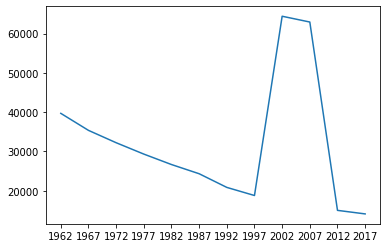

In [ ]:
import matplotlib.pyplot as plt
plt.plot( mean_rifr )
plt.show()

In [ ]:
rifr_sorted = rifr.sort_values(['2007', '2012'], ascending=(False, False))
rifr_sorted.head()

,Country Code,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007,2012,2017
89,GRL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.065202e+07,1.066219e+07,NaN,NaN
112,ISL,932129.971817,855341.608344,812864.294697,766459.722542,726930.642265,691453.231324,651198.780343,627010.120681,5.912570e+05,5.456308e+05,530063.981841,495049.504950
92,GUY,397502.824579,356576.920744,333819.056220,316097.079840,308481.579426,318173.656805,321933.417223,317954.536459,3.235816e+05,3.228512e+05,319036.694515,310879.091253
218,SUR,325771.486110,284750.325737,269089.742788,276807.708116,274293.693739,259820.015589,235345.577643,217982.451312,2.052971e+05,1.936692e+05,182910.944541,173531.685308
187,PNG,342256.207613,308454.186274,274490.008872,242533.760185,212552.371870,186601.804097,165625.322437,147063.116515,1.313412e+05,1.176468e+05,104966.556161,94927.381738


As we can see, there is definitely an outlier in the row 89 for the two years 2002 and 2007. Let´s get rid of him.

In [ ]:
# Delete row with index label '89' 
rifr_modi = rifr.drop(index=89 )

In [ ]:
rifr_modi.describe()

,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007,2012,2017
count,197.000000,197.000000,198.000000,198.000000,198.000000,198.000000,220.000000,225.000000,226.000000,227.000000,228.000000,227.000000
mean,39691.071342,35360.823620,32218.536111,29325.995708,26666.949630,24325.115022,20848.417820,18785.620435,17550.144740,16231.372063,15005.687546,14101.975250
std,93957.420653,84644.955100,78072.869462,72480.774352,67685.172606,63726.352537,56987.824382,53428.246812,50463.192850,47074.835968,45271.266142,42686.354450
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.646926,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2897.578359,2564.946388,2399.116774,2216.459213,2010.339925,1856.413693,1688.306525,1511.543363,1376.522413,1264.142861,1159.751875,1067.558002
50%,7885.871166,7031.870782,6488.940105,6217.288588,5664.972221,4975.607995,4883.692755,4196.445835,4176.479445,3816.941609,3526.840514,3361.771700
75%,28585.435702,25631.065405,24235.611937,22503.339680,21571.593906,19912.703422,13837.505336,13336.341722,12681.427221,11472.755596,10099.787446,9920.276716
max,932129.971817,855341.608344,812864.294697,766459.722542,726930.642265,691453.231324,651198.780343,627010.120681,591257.047262,545630.781279,530063.981841,495049.504950


In [ ]:
rifr_modi_mean = rifr_modi.mean(axis=0)

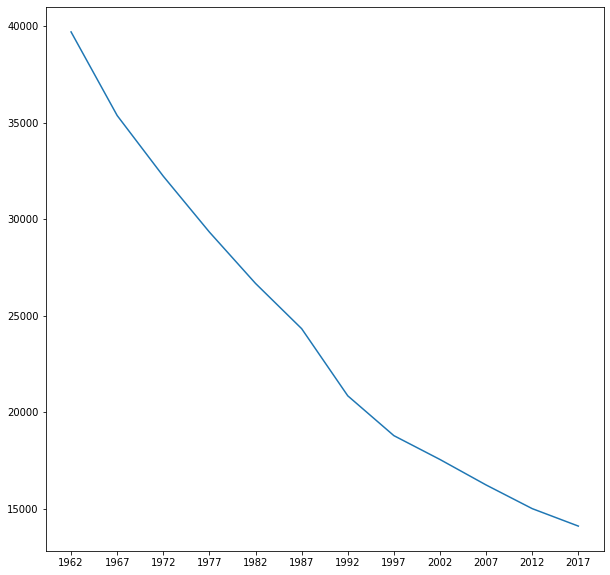

In [ ]:
import matplotlib.pyplot as plt
plt.plot( rifr_modi_mean )
plt.show()

Let´s display it better

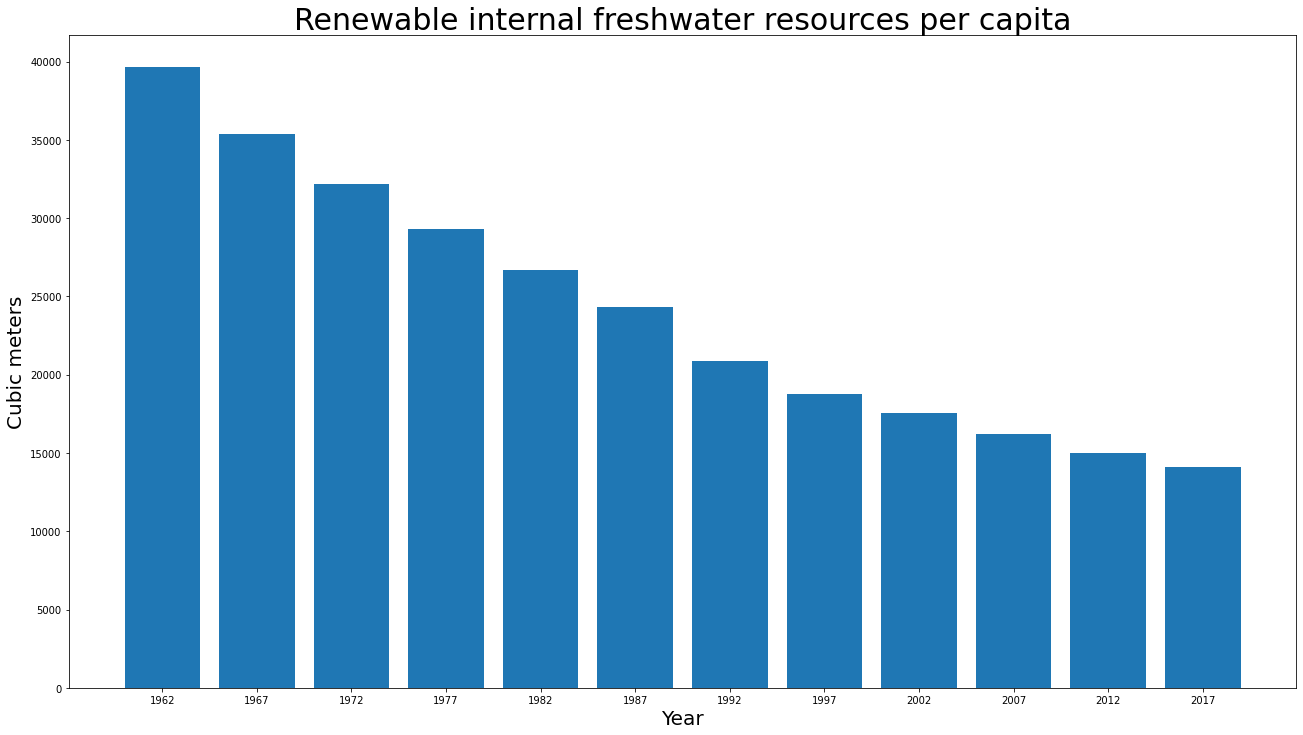

In [ ]:
plt.figure(figsize=(22,12))
plt.xlabel('Year', fontsize=20)
plt.ylabel('Cubic meters', fontsize=20)
plt.title('Renewable internal freshwater resources per capita', fontsize=30)
plt.bar(rifr_modi_mean.index, rifr_modi_mean.values)
plt.show()

Now, our dataset Renewable internal freshwater resources per capita = > rifr per capita is clean and ready for building a model. I decided to use linear  regression model. 

In [ ]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
# prepare X,y
X = rifr_modi_mean.index.to_frame()
y = rifr_modi_mean.values
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train

,0
2012,2012
1972,1972
2002,2002
1967,1967
1997,1997
2007,2007
1977,1977
1962,1962
1987,1987


In [ ]:
X_test

,0
1992,1992
2017,2017
1982,1982


In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [ ]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [-490.79749977]
Mean squared error: 5849828.08
Coefficient of determination: 0.78


In [ ]:
 from numpy import array
# Plot outputs
#plt.scatter(X_test, y_test, color='black')
#plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


In [ ]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')